In [1]:
# Jupyter notebooks have problems with imports from parent folder, so let's change the path
from jupyter_utils import change_path_to_parent
change_path_to_parent()

import matplotlib
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy.sparse import csc_matrix, csr_matrix

from datasets import get_dataset
from first_order import Adgd, AdgdAccel, Gd, Nesterov, Ogm, Polyak, RestNest
from loss_functions import LogisticRegression

sns.set(style="whitegrid", context="talk", palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [2]:
A, b = get_dataset('news20_class1')
loss = LogisticRegression(A, b, l1=0, l2=0)
n, dim = A.shape
if dim <= 1000:
    L = loss.smoothness
else:
    L = loss.average_smoothness
l2 = 1e-5 * L
loss.l2 = l2
x0 = csc_matrix((dim, 1))
it_max = 2500

## Best accelerated method

In [3]:
nest = Nesterov(loss=loss, it_max=it_max)
nest2 = Nesterov(loss=loss, it_max=it_max, strongly_convex=True, mu=l2)
rest = RestNest(loss=loss, it_max=it_max)
rest2 = RestNest(loss=loss, func_condition=True, it_max=it_max)
rest3 = RestNest(loss=loss, it_max=it_max, doubling=True)
adgda = AdgdAccel(loss=loss, it_max=it_max)
ogm = Ogm(loss=loss, it_max=it_max)
ogm2 = Ogm(loss=loss, it_max=it_max, strongly_convex=True, mu=l2)
accelerated_optimizers = [nest, nest2, rest, rest2, rest3, adgda, ogm, ogm2]
labels = ['Nesterov', 'Nesterov for str. convex', 'Nesterov restarts grad', 'Nesterov restarts func',
          'Nesterov restarts doubling', 'Accelerated AdGD', 'OGM', 'OGM for str. convex']
markers = [',', 'o', '^', '*', 'd', 's', 'X', 'P', '.', 6, 7]

Running optimizer: Nesterov
Running optimizer: Nesterov for str. convex
Running optimizer: Nesterov restarts grad
Running optimizer: Nesterov restarts func
Running optimizer: Nesterov restarts doubling
Running optimizer: Accelerated AdGD
Running optimizer: OGM
Running optimizer: OGM for str. convex


findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


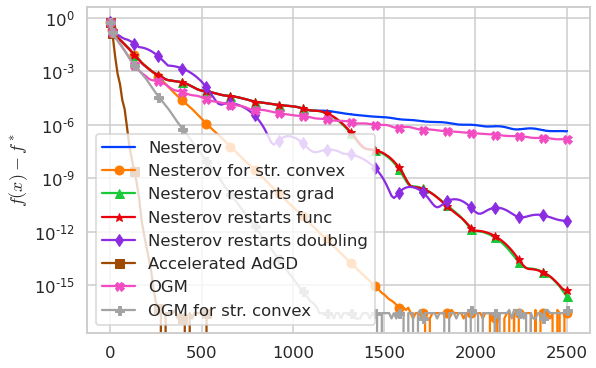

In [4]:
plt.figure(figsize=(9, 6))
for opt, label in zip(accelerated_optimizers, labels):
    print(f'Running optimizer: {label}')
    opt.run(x0=x0)
    opt.compute_loss_of_iterates()

for opt, label, marker in zip(accelerated_optimizers, labels, markers):
    opt.trace.plot_losses(label=label, marker=marker)
plt.yscale('log')
plt.legend()

## Compare it with others

In [5]:
gd = Gd(loss=loss, it_max=it_max)
adgd = Adgd(loss=loss, it_max=it_max)
pol = Polyak(loss=loss, it_max=it_max, f_opt=loss.f_opt)
optimizers = [gd, adgd, adgda, pol, ogm2]
labels = ['GD', 'AdGD', 'Accelerated AdGD', 'Polyak', 'OGM for str. convex']

Running optimizer: GD
Running optimizer: AdGD
Running optimizer: Accelerated AdGD
Loss values have already been computed. Set .loss_vals = [] to recompute
Running optimizer: Polyak
Running optimizer: OGM for str. convex
Loss values have already been computed. Set .loss_vals = [] to recompute


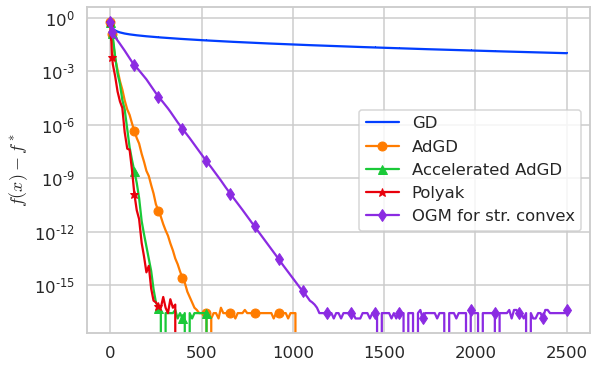

In [6]:
plt.figure(figsize=(9, 6))
for opt, label in zip(optimizers, labels):
    print(f'Running optimizer: {label}')
    opt.run(x0=x0)
    opt.compute_loss_of_iterates()

for opt, label, marker in zip(optimizers, labels, markers):
    opt.trace.plot_losses(label=label, marker=marker)
plt.yscale('log')
plt.legend()

#### Todo: more algorithms